In [1]:
# Imports
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stops = pd.read_csv('../data/stops.csv')

stops.head()

,Route ID,Stop ID,Stop Name,Latitude,Longitude
0,MTA%20NYCT_Q1,MTA_500002,165 ST/HILLSIDE AV,40.709146,-73.797156
1,MTA%20NYCT_Q1,MTA_500004,HILLSIDE AV/171 ST,40.711440,-73.790887
2,MTA%20NYCT_Q1,MTA_500007,HILLSIDE AV/180 ST,40.712872,-73.782724
3,MTA%20NYCT_Q1,MTA_500008,HILLSIDE AV/182 PL,40.713574,-73.779850
4,MTA%20NYCT_Q1,MTA_500009,HILLSIDE AV/184 ST,40.714085,-73.777516


In [3]:
stops.columns = ['route_id', 'stop_id', 'stop_name', 'latitude', 'longitude']
stops.head()

,route_id,stop_id,stop_name,latitude,longitude
0,MTA%20NYCT_Q1,MTA_500002,165 ST/HILLSIDE AV,40.709146,-73.797156
1,MTA%20NYCT_Q1,MTA_500004,HILLSIDE AV/171 ST,40.711440,-73.790887
2,MTA%20NYCT_Q1,MTA_500007,HILLSIDE AV/180 ST,40.712872,-73.782724
3,MTA%20NYCT_Q1,MTA_500008,HILLSIDE AV/182 PL,40.713574,-73.779850
4,MTA%20NYCT_Q1,MTA_500009,HILLSIDE AV/184 ST,40.714085,-73.777516


In [4]:
stops['route_id'] = ['_'.join(route.split('%20')) for route in stops['route_id']]
stops.head()

,route_id,stop_id,stop_name,latitude,longitude
0,MTA_NYCT_Q1,MTA_500002,165 ST/HILLSIDE AV,40.709146,-73.797156
1,MTA_NYCT_Q1,MTA_500004,HILLSIDE AV/171 ST,40.711440,-73.790887
2,MTA_NYCT_Q1,MTA_500007,HILLSIDE AV/180 ST,40.712872,-73.782724
3,MTA_NYCT_Q1,MTA_500008,HILLSIDE AV/182 PL,40.713574,-73.779850
4,MTA_NYCT_Q1,MTA_500009,HILLSIDE AV/184 ST,40.714085,-73.777516


In [5]:
stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   route_id   2300 non-null   object 
 1   stop_id    2300 non-null   object 
 2   stop_name  2300 non-null   object 
 3   latitude   2300 non-null   float64
 4   longitude  2300 non-null   float64
dtypes: float64(2), object(3)
memory usage: 90.0+ KB


In [6]:
stops.describe(include = 'all')

,route_id,stop_id,stop_name,latitude,longitude
count,2300,2300,2300,2300.000000,2300.000000
unique,23,1653,1194,NaN,NaN
top,MTA_NYCT_Q27,MTA_500004,ARCHER AV/SUTPHIN BLVD,NaN,NaN
freq,153,7,12,NaN,NaN
mean,NaN,NaN,NaN,40.727568,-73.777085
std,NaN,NaN,NaN,0.032617,0.033510
min,NaN,NaN,NaN,40.644892,-73.878374
25%,NaN,NaN,NaN,40.704223,-73.799480
50%,NaN,NaN,NaN,40.725414,-73.777023
75%,NaN,NaN,NaN,40.753651,-73.751026


In [7]:
stops_gdf = gpd.GeoDataFrame(
    stops, geometry = gpd.points_from_xy(stops['longitude'], stops['latitude']), crs="EPSG:4326"
)

stops_gdf.head()

,route_id,stop_id,stop_name,latitude,longitude,geometry
0,MTA_NYCT_Q1,MTA_500002,165 ST/HILLSIDE AV,40.709146,-73.797156,POINT (-73.79716 40.70915)
1,MTA_NYCT_Q1,MTA_500004,HILLSIDE AV/171 ST,40.711440,-73.790887,POINT (-73.79089 40.71144)
2,MTA_NYCT_Q1,MTA_500007,HILLSIDE AV/180 ST,40.712872,-73.782724,POINT (-73.78272 40.71287)
3,MTA_NYCT_Q1,MTA_500008,HILLSIDE AV/182 PL,40.713574,-73.779850,POINT (-73.77985 40.71357)
4,MTA_NYCT_Q1,MTA_500009,HILLSIDE AV/184 ST,40.714085,-73.777516,POINT (-73.77752 40.71408)


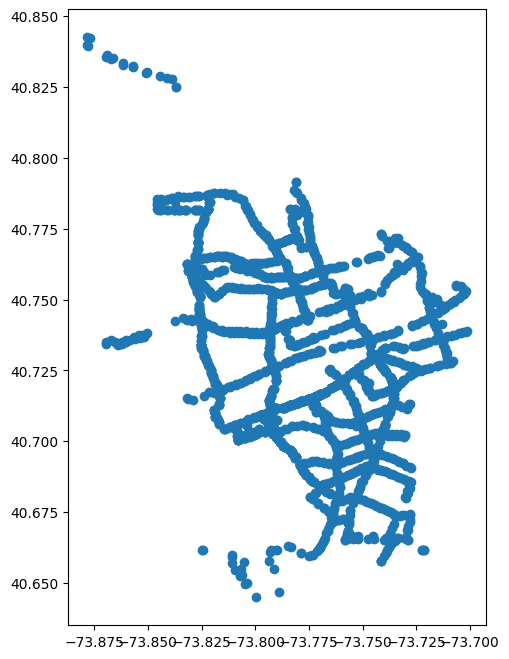

In [8]:
fig, ax = plt.subplots(figsize = (8,8))
stops_gdf.plot(ax = ax)
plt.savefig('../images/east_queens_bus_map.png', dpi = 300)

In [9]:
# Load NYC borough boundaries
nyc_boundaries = gpd.read_file('../data/borough_boundaries.geojson')

nyc_boundaries

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,1,Manhattan,636646043.944,360037.634094,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
2,2,Bronx,1187174772.2,463180.578868,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
3,3,Brooklyn,1934142774.75,728143.833073,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4,Queens,3041416726.79,887896.284851,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [10]:
nyc_boundaries.describe(include = 'all')

,boro_code,boro_name,shape_area,shape_leng,geometry
count,5,5,5,5,5
unique,5,5,5,5,5
top,5,Staten Island,1623618684.31,325910.306061,MULTIPOLYGON (((-74.05050806403247 40.56642203...
freq,1,1,1,1,1


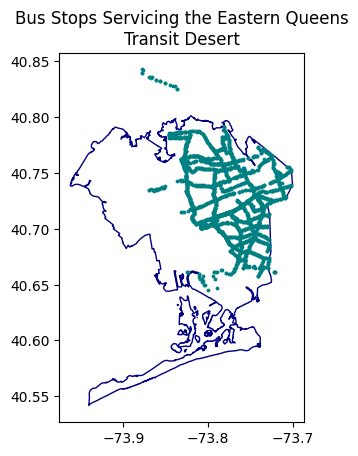

In [11]:
# Filter to Queens
queens_boundaries = nyc_boundaries[nyc_boundaries['boro_name'] == 'Queens']

# Plot stops on a map
base_layer = queens_boundaries.plot(color = 'white', edgecolor = 'navy')
stops_gdf.plot(ax = base_layer, color = 'teal', markersize = 3)
plt.title("Bus Stops Servicing the Eastern Queens\nTransit Desert")
plt.savefig('../images/east_queens_overlay.png', dpi = 300)
plt.show();

In [12]:
# Load NYC Neighborhoods
nyc_by_neighborhood = gpd.read_file('../data/nyc_by_neighborhood_2020.geojson')

nyc_by_neighborhood.head()

,shape_area,ntaname,cdtaname,shape_leng,boroname,ntatype,nta2020,borocode,countyfips,ntaabbrev,cdta2020,geometry
0,35321204.8204,Greenpoint,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28912.5653122,Brooklyn,0,BK0101,3,047,Grnpt,BK01,"MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ..."
1,28854314.555,Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28098.0267744,Brooklyn,0,BK0102,3,047,Wllmsbrg,BK01,"MULTIPOLYGON (((-73.95814 40.7244, -73.95772 4..."
2,15208960.44,South Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),18250.2804159,Brooklyn,0,BK0103,3,047,SWllmsbrg,BK01,"MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ..."
3,52266209.4439,East Williamsburg,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),43184.773814,Brooklyn,0,BK0104,3,047,EWllmsbrg,BK01,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ..."
4,9982321.73877,Brooklyn Heights,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,14312.506134,Brooklyn,0,BK0201,3,047,BkHts,BK02,"MULTIPOLYGON (((-73.99103 40.69985, -73.99124 ..."


In [13]:
nyc_by_neighborhood.describe(include = 'all')

,shape_area,ntaname,cdtaname,shape_leng,boroname,ntatype,nta2020,borocode,countyfips,ntaabbrev,cdta2020,geometry
count,262,262,262,262,262,262,262,262,262,262,262,262
unique,262,262,71,262,5,6,262,5,5,262,71,262
top,23377916.5113,Great Kills Park,QN01 Astoria-Queensbridge (CD 1 Equivalent),41763.1645788,Queens,0,SI9593,4,081,GrtKlsPk,QN01,MULTIPOLYGON (((-73.96283963628261 40.69803866...
freq,1,1,9,1,82,197,1,82,82,1,9,1


In [14]:
# Filter to Queens
queens_neighborhoods = nyc_by_neighborhood[nyc_by_neighborhood['boroname'] == 'Queens']

# Perform a spatial join to assign stops to each neighborhood
stops_by_neighborhood = gpd.sjoin(stops_gdf, queens_neighborhoods, how = 'inner', predicate = 'within')

stops_by_neighborhood.head()

,route_id,stop_id,stop_name,latitude,longitude,geometry,index_right,shape_area,ntaname,cdtaname,shape_leng,boroname,ntatype,nta2020,borocode,countyfips,ntaabbrev,cdta2020
0,MTA_NYCT_Q1,MTA_500002,165 ST/HILLSIDE AV,40.709146,-73.797156,POINT (-73.79716 40.70915),215,46824594.0674,Jamaica,QN12 Jamaica-St. Albans-Hollis (CD 12 Approxim...,41771.9327189,Queens,0,QN1201,4,081,Jmca,QN12
1,MTA_NYCT_Q1,MTA_500004,HILLSIDE AV/171 ST,40.711440,-73.790887,POINT (-73.79089 40.71144),215,46824594.0674,Jamaica,QN12 Jamaica-St. Albans-Hollis (CD 12 Approxim...,41771.9327189,Queens,0,QN1201,4,081,Jmca,QN12
2,MTA_NYCT_Q1,MTA_500007,HILLSIDE AV/180 ST,40.712872,-73.782724,POINT (-73.78272 40.71287),215,46824594.0674,Jamaica,QN12 Jamaica-St. Albans-Hollis (CD 12 Approxim...,41771.9327189,Queens,0,QN1201,4,081,Jmca,QN12
3,MTA_NYCT_Q1,MTA_500008,HILLSIDE AV/182 PL,40.713574,-73.779850,POINT (-73.77985 40.71357),215,46824594.0674,Jamaica,QN12 Jamaica-St. Albans-Hollis (CD 12 Approxim...,41771.9327189,Queens,0,QN1201,4,081,Jmca,QN12
4,MTA_NYCT_Q1,MTA_500009,HILLSIDE AV/184 ST,40.714085,-73.777516,POINT (-73.77752 40.71408),215,46824594.0674,Jamaica,QN12 Jamaica-St. Albans-Hollis (CD 12 Approxim...,41771.9327189,Queens,0,QN1201,4,081,Jmca,QN12


In [15]:
# Group by Neighborhood and Count
stops_by_neighborhood['count'] = 1
stop_density = stops_by_neighborhood.groupby(by = 'ntaname').size().reset_index(name = "stop_count")

# Merge stop_density back into stops_by_neighborhood to plot
queens_neighborhoods = queens_neighborhoods.merge(stop_density, on = 'ntaname', how = 'left')

# Fill NaN values for neighborhoods with no stops|
queens_neighborhoods['stop_count'] = queens_neighborhoods['stop_count'].fillna(0)

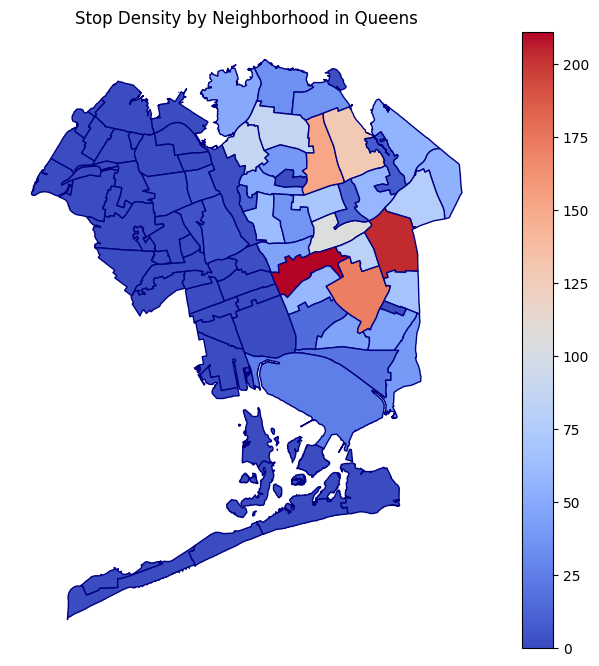

In [16]:
# Stop Density Heatmap
queens_neighborhoods.plot(
    column = 'stop_count',
    cmap = 'coolwarm',
    legend = 'True',
    figsize = (10, 8),
    edgecolor = 'navy'
)
plt.title('Stop Density by Neighborhood in Queens')
plt.axis('off')
plt.savefig('../images/eastern_queens_stop_density.png', dpi = 300)
plt.show();

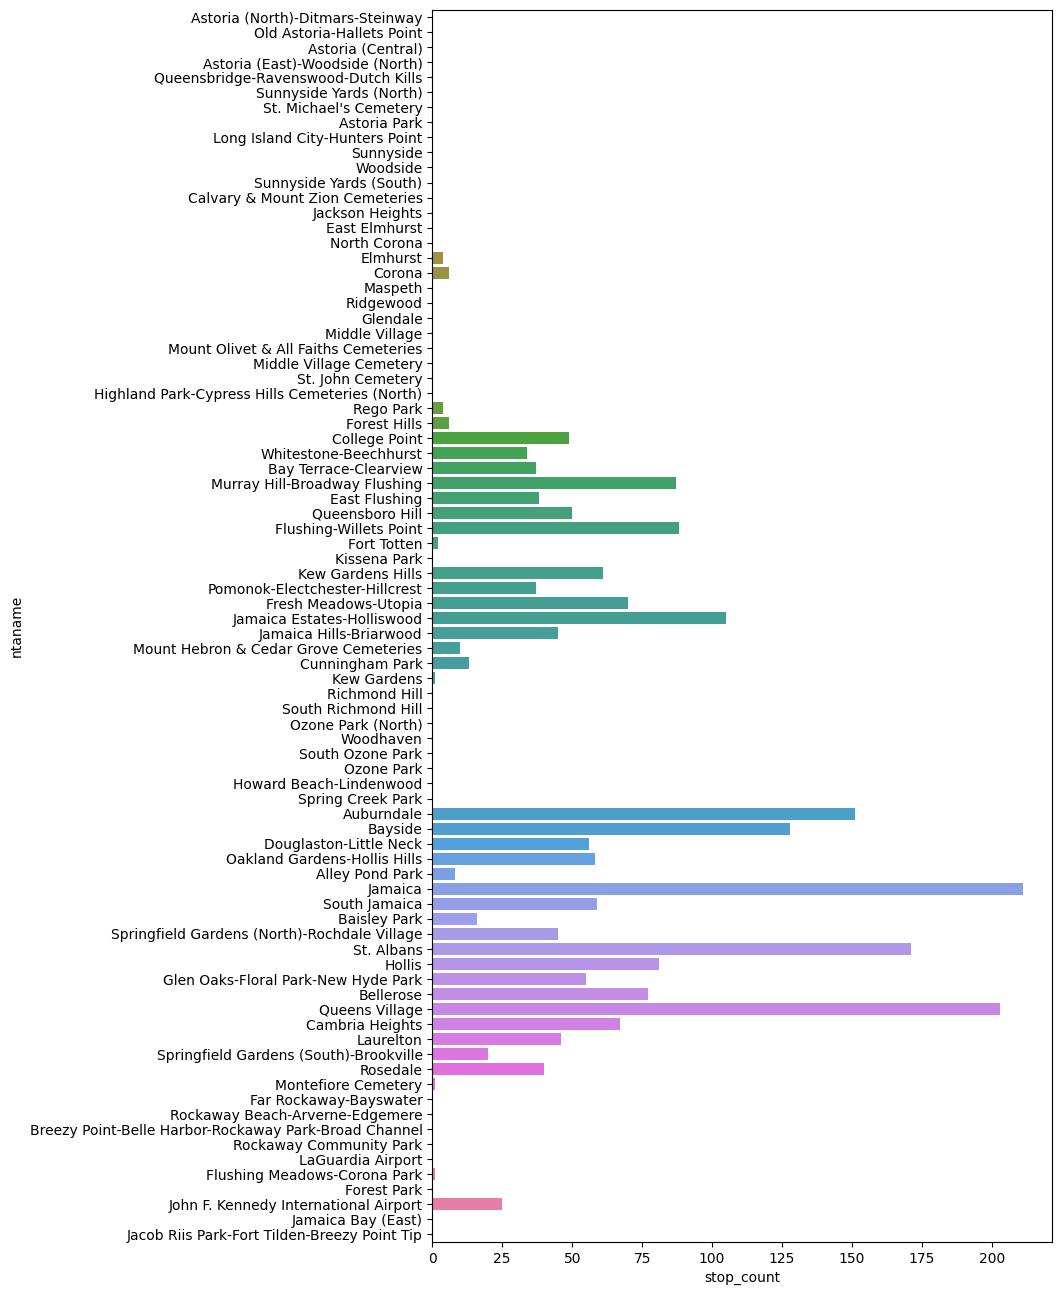

In [27]:
plt.figure(figsize = (8, 16))
sns.barplot(
    data = queens_neighborhoods,
    x = 'stop_count',
    y = 'ntaname',
    hue = 'ntaname'
);